### Import libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

### Load and visualize data

*   categories.npy
*   training_data.npy
*   valid_periods.npy

In [ ]:
categories = np.load('categories.npy')
training_data = np.load('training_data.npy')
valid_periods = np.load('valid_periods.npy')
print(f"categories shape: {categories.shape} , Type: {categories.dtype}")
print(f"training_data shape: {training_data.shape} , Type: {training_data.dtype}")
print(f"valid_periods shape: {valid_periods.shape} , Type: {valid_periods.dtype}")

categories shape: (48000,) , Type: <U1
training_data shape: (48000, 2776) , Type: float64
valid_periods shape: (48000, 2) , Type: int64


In [ ]:
training_data

array([[0.        , 0.        , 0.        , ..., 0.60277778, 0.36759259,
        0.33148148],
       [0.        , 0.        , 0.        , ..., 0.6       , 0.46      ,
        0.396     ],
       [0.        , 0.        , 0.        , ..., 0.96048126, 0.94650625,
        0.97714021],
       ...,
       [0.        , 0.        , 0.        , ..., 0.52631579, 0.58223684,
        0.55263158],
       [0.        , 0.        , 0.        , ..., 0.44559585, 0.58549223,
        0.40414508],
       [0.        , 0.        , 0.        , ..., 0.54268293, 0.6097561 ,
        0.59146341]])

### Split data

*   categories.npy
*   training_data.npy
*   valid_periods.npy

In [ ]:
ohencoder = OneHotEncoder(sparse=False)
categories_ = np.expand_dims(ohencoder.fit_transform(categories.reshape(-1,1))

In [ ]:
np.expand_dims(training_data, axis=2).shape

(48000, 2776, 1)

In [ ]:
categories_

array([[[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]]])

In [ ]:
ohencoder.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F'], dtype='<U1')]

In [ ]:
categories.reshape(-1,1)[:50].shape

(50, 1)

In [ ]:
categories.reshape(-1,1).shape

(48000, 1)

In [ ]:
encoder = OneHotEncoder(sparse=False, categories=[['A', 'B', 'C', 'D', 'E', 'F']])
encoder.fit(categories.reshape(-1,1)[:1])
encoder.transform(categories.reshape(-1,1)[1:])

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
encoder = OneHotEncoder(sparse=False, categories=[['A', 'B', 'C', 'D', 'E', 'F']])
encoder.fit(categories.reshape(-1,1)[:50])

OneHotEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F']], sparse=False,
              sparse_output=False)

In [ ]:
encoder.transform(categories.reshape(-1,1)[:50])

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
np.all(encoder.transform(categories.reshape(-1,1)[50:]) == ohencoder.transform(categories.reshape(-1,1)[50:]))

True

#### Split

In [ ]:
# Define Transformer hyperparameters
window = 200
stride = 2
telescope = 18
latent_dim = 128
num_heads = 4

In [ ]:
def build_sequences(data, valid_periods, categories, window=200, stride=20, telescope=100):
    assert window % stride == 0

    dataset = []
    #labels = []
    category_labels = []

    # Iterate over each time series
    for idx in range(len(data)):
        series_data = data[idx]
        series_valid_periods = valid_periods[idx]
        series_category = categories[idx]

        # Start building sequences from the first valid period
        start_index = series_valid_periods[0]

        # Build sequences for the current time series
        for i in range(len(series_data) - window - telescope, start_index, -stride):
            dataset.append(series_data[i:i + window + telescope])
            #labels.append(series_data[i + window:i + window + telescope])
            category_labels.append(series_category)

    # Convert lists to numpy arrays
    dataset = np.array(dataset)
    #labels = np.array(labels)
    category_labels = np.array(category_labels)

    return np.expand_dims(dataset, axis=-1), np.expand_dims(category_labels, axis=-1) #np.expand_dims(labels, axis=-1),

x, category_labels = build_sequences(training_data, valid_periods, categories, window, stride, telescope)

In [ ]:
del training_data

In [ ]:
# given the categories, split into training and validation data with a stratified split of 90/10
from sklearn.model_selection import train_test_split
x_train, x_test, category_train_labels, category_test_labels = train_test_split(x, category_labels, test_size=0.1, stratify=category_labels[:, 0])

In [ ]:
del x, category_labels

In [ ]:
x_train, x_val, category_train_labels, category_val_labels = train_test_split(x_train, category_train_labels, test_size=0.1, stratify=category_train_labels[:, 0])

x_train.shape, category_train_labels.shape, x_val.shape, x_test.shape, category_test_labels.shape

((865741, 218, 1),
 (865741, 6, 1),
 (96194, 218, 1),
 (106882, 218, 1),
 (106882, 6, 1))

In [ ]:
# given the categories, split into training and validation data with a stratified split of 90/10
#from sklearn.model_selection import train_test_split

#train_data, test_data, training_valid_p, test_valid_p, training_cats, test_cats = train_test_split(training_data, valid_periods, categories, test_size=0.1, stratify=categories)
#train_data, val_data, training_valid_p, val_valid_p, training_cats, val_cats = train_test_split(train_data, training_valid_p, training_cats, test_size=0.1, stratify=training_cats)

In [ ]:
input_shape = x_train.shape[1:]
cat_shape = category_train_labels.shape[1:]
input_shape, x_test.shape[1:], cat_shape

((218, 1), (218, 1), (6, 1))

In [ ]:
x_train.shape, x_test.shape

((865741, 218, 1), (106882, 218, 1))

#### Model

This notebook contains the implementation of the TSMixer model. It follows marcopeix implementation in https://github.com/marcopeix/time-series-analysis/blob/master/TSMixer.ipynb . This is the version of our best model. It leverages category information in every TSMixer Block by concatenating it with the block input representation, and passing it through a Dense Layer with the desired length.

In [ ]:
from tensorflow.keras import layers

def res_block(inputs, ff_dim, cats, dropout):

  norm = layers.BatchNormalization

  catx = layers.Concatenate(axis=1)([inputs, cats])
  catx = tf.transpose(catx, perm=[0, 2, 1])  # [Batch, Channel, Input Length]
  catx = layers.Dense(inputs.shape[1])(catx)
  catx = tf.transpose(catx, perm=[0, 2, 1])  # [Batch, Input Length, Channel]
  x = layers.Add()([inputs, catx])

  # Time mixing
  x = norm(axis=[-2, -1])(x)
  x = tf.transpose(x, perm=[0, 2, 1])  # [Batch, Channel, Input Length]
  x = layers.Dense(x.shape[-1], activation='relu')(x)
  x = tf.transpose(x, perm=[0, 2, 1])  # [Batch, Input Length, Channel]
  x = layers.Dropout(dropout)(x)
  res = x + inputs

  # Feature mixing
  x = norm(axis=[-2, -1])(res)
  x = layers.Dense(ff_dim, activation='relu')(x)  # [Batch, Input Length, FF_Dim]
  x = layers.Dropout(dropout)(x)
  x = layers.Dense(inputs.shape[-1])(x)  # [Batch, Input Length, Channel]
  x = layers.Dropout(dropout)(x)
  return x + res

In [ ]:
def build_model(
    input_shape,
    cat_shape,
    pred_len,
    n_block,
    ff_dim,
    dropout=0.5,
):

  inputs = tf.keras.Input(shape=input_shape)
  cats = tf.keras.Input(shape=cat_shape)

  x = inputs  # [Batch, Input Length, Channel]
  for _ in range(n_block):
    x = res_block(x, ff_dim, cats, dropout)

  # Temporal projection
  x = tf.transpose(x, perm=[0, 2, 1])  # [Batch, Channel, Input Length]
  x = layers.Dense(pred_len)(x)  # [Batch, Channel, Output Length]
  outputs = tf.transpose(x, perm=[0, 2, 1])  # [Batch, Output Length, Channel])

  return tf.keras.Model([inputs, cats], outputs)

In [ ]:
model = build_model(
    (window, 1),
    cat_shape,
    pred_len=telescope,
    n_block=8,
    ff_dim=128,
    dropout=0.1
)

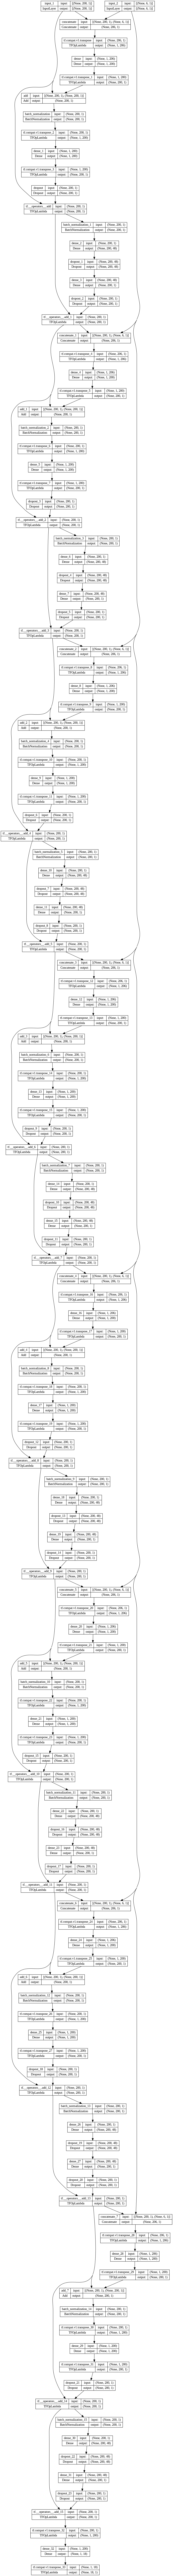

In [ ]:
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-3)

model.compile(optimizer, loss='mse', metrics=['mae'])

In [ ]:
!pip install tsgm

In [ ]:
x_train.shape

(865741, 218, 1)

In [ ]:
import tsgm
import random

size_per_class = 10000

def augment_data(data, cats):
    # Create empty lists to store augmented data and corresponding categories
    augmented_data = []
    augmented_categories = []

    # Iterate over each category (assuming 6 categories)
    for category in range(6):
        # Retrieve the data corresponding to the current category
        print(cats.shape)
        arg_max = tf.math.argmax(cats[:, :, 0], axis=1)
        category_data = data[arg_max == category]

        if data.shape[0]:
          aug_model = tsgm.models.augmentations.WindowWarping()
          aug_model2 = tsgm.models.augmentations.MagnitudeWarping()
          samples = aug_model.generate(X=category_data, n_samples=size_per_class, scales=(0.3,), window_ratio=0.3)
          samples = aug_model2.generate(X=samples, n_samples=size_per_class, sigma=0.5)
          # Append the generated samples and corresponding category labels to the lists
          augmented_data.append(samples)
        else:
          augmented_data.append(category_data)

        augmented_categories.extend([np.eye(6)[category]] * size_per_class)

    # Concatenate the augmented data
    augmented_data = tf.convert_to_tensor(augmented_data)
    augmented_categories = tf.convert_to_tensor(augmented_categories)
    print(augmented_data.shape)
    return tf.convert_to_tensor([augmented_data[:, :200, :], augmented_categories]), augmented_data[:, 200:, :]


In [ ]:
EPOCHS = 10

history = model.fit(
    [x_train, category_train_labels],
    y_train,
    batch_size=128,
    epochs=EPOCHS,
    validation_data = ([x_val, category_val_labels], y_val),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2, factor=0.1, min_lr=1e-5)
    ]
)

In [ ]:
model = tf.keras.models.load_model('tsmixer')


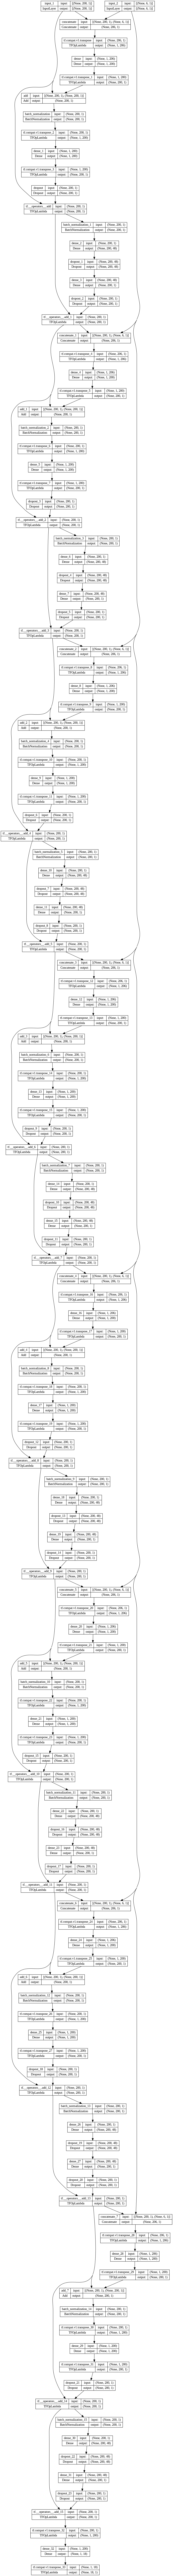

In [ ]:
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

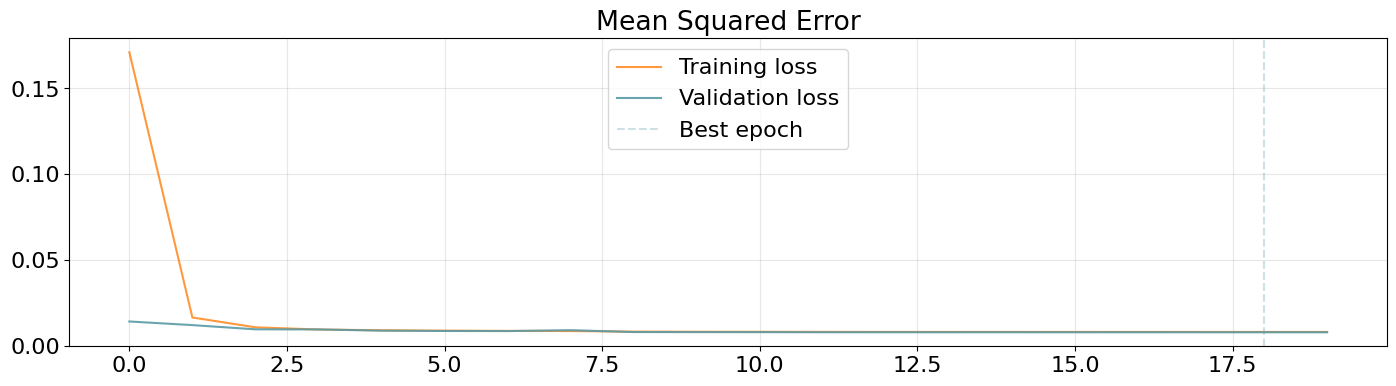

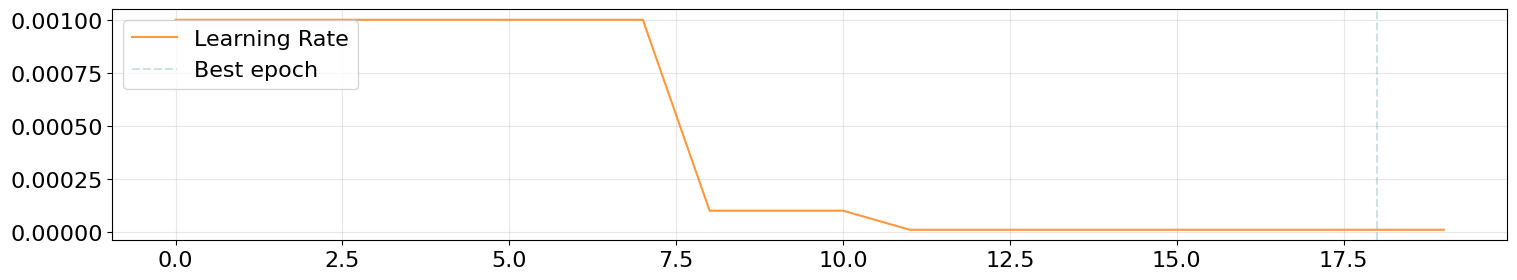

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:

# Predict the test set using the model
predictions = model.predict(x=[x_test, category_test_labels], verbose=0)

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_test.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (213222, 18, 1)
Mean Squared Error: 0.007782116066664457
Mean Absolute Error: 0.05706389248371124


In [ ]:
def inspect_univariate_prediction(X, y, pred, telescope, labels, idx=None):
    if idx is None:
        idx = np.random.randint(0, len(X))

    pred = np.concatenate([np.expand_dims(X[:, -1], axis=1), pred.squeeze()], axis=1)
    y = np.concatenate([np.expand_dims(X[:, -1], axis=1), y.squeeze()], axis=1)

    print(idx, pred[idx].shape, y[idx].shape, labels[idx])

    fig, ax = plt.subplots(figsize=(17, 5))
    ax.plot(np.arange(len(X[0])), X[idx])
    ax.plot(np.arange(len(X[0]) - 1, len(X[0]) + telescope), y[idx], color='orange')
    ax.plot(np.arange(len(X[0]) - 1, len(X[0]) + telescope), pred[idx], color='green')
    ax.set_title(f'Prediction vs Actual, {np.argmax(labels[idx])}')
    plt.show()


In [ ]:
x_test.squeeze().shape, y_test.squeeze().shape, predictions.shape

((213222, 200), (213222, 18), (213222, 18, 1))

41262 (19,) (19,) [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


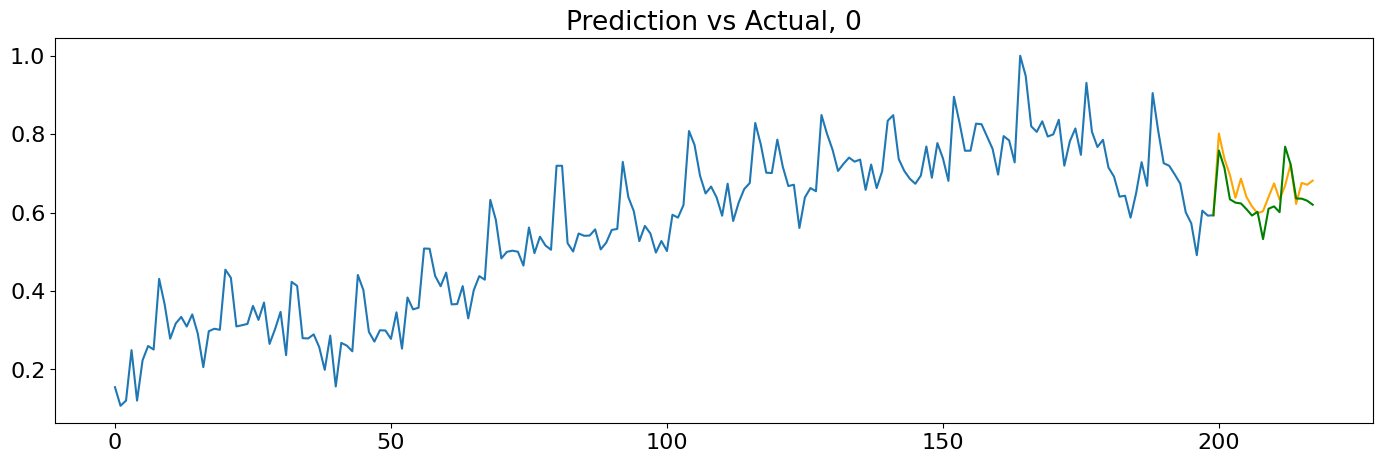

In [ ]:
inspect_univariate_prediction(x_test.squeeze(), y_test.squeeze(), predictions, telescope, category_test_labels)